In [2]:
!pip install kagglehub
!pip install tensorflow
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install transformers
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

100%|██████████| 2.93G/2.93G [00:45<00:00, 68.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1
Dataset directory contents: ['test', 'train', 'val']
Contents of test: ['Normal', 'OSCC']
Contents of train: ['Normal', 'OSCC']
Contents of val: ['Normal', 'OSCC']
Dataset directory contents: ['test', 'train', 'val']
Checking folder: test
Checking folder: train
Checking folder: val
Total images in test/Normal: 31
Total images in test/OSCC: 95
Total images in train/Normal: 2435
Total images in train/OSCC: 2511
Total images in val/Normal: 28
Total images in val/OSCC: 92
Listing images in /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/train/Normal...
Total images in Normal: 2435


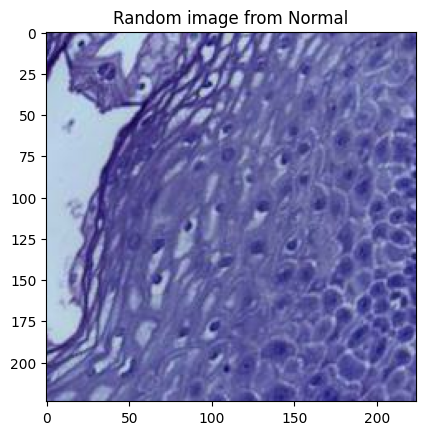

Listing images in /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/train/OSCC...
Total images in OSCC: 2511


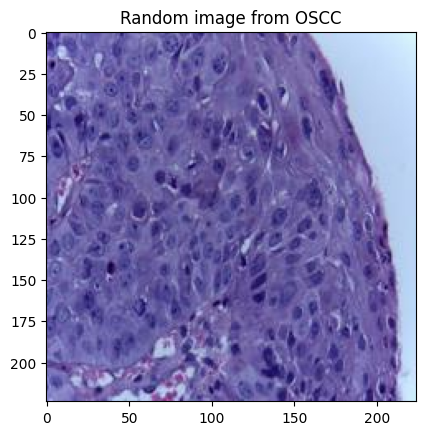

In [3]:
# Import required libraries
import kagglehub
import os
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from transformers import ViTFeatureExtractor, ViTForImageClassification

path = kagglehub.dataset_download("ashenafifasilkebede/dataset")
print("Path to dataset files:", path)
dataset_path = path
print("Dataset directory contents:", os.listdir(dataset_path))
for subdir in os.listdir(dataset_path):
    subdir_path = os.path.join(dataset_path, subdir)
    if os.path.isdir(subdir_path):
        print(f"Contents of {subdir}: {os.listdir(subdir_path)}")
dataset_path = path
print("Dataset directory contents:", os.listdir(dataset_path))
# Function to list the number of images in each subfolder
def count_images_in_subfolders(base_path):
    image_counts = {}
    for subdir in os.listdir(base_path):
        subdir_path = os.path.join(base_path, subdir)
        if os.path.isdir(subdir_path):
            print(f"Checking folder: {subdir}")
            for category in os.listdir(subdir_path):
                category_path = os.path.join(subdir_path, category)
                if os.path.isdir(category_path):
                    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                    image_counts[f"{subdir}/{category}"] = len(image_files)
    return image_counts

# List the number of images in each folder and category
image_counts = count_images_in_subfolders(path)

# Print the total number of images for each folder/category
for folder_category, count in image_counts.items():
    print(f"Total images in {folder_category}: {count}")

import random
import matplotlib.pyplot as plt
import tensorflow as tf

# List total images
def list_and_show_random_image(base_path):
    for subdir in os.listdir(base_path):
        subdir_path = os.path.join(base_path, subdir)
        if os.path.isdir(subdir_path):
            print(f"Listing images in {subdir_path}...")
            image_files = [f for f in os.listdir(subdir_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            print(f"Total images in {subdir}: {len(image_files)}")
            if len(image_files) > 0:
                # Pick a random image
                random_img = random.choice(image_files)
                img_path = os.path.join(subdir_path, random_img)
                img = tf.io.read_file(img_path)
                img = tf.image.decode_jpeg(img, channels=3)
                img = tf.image.resize(img, (224, 224))
                img = img / 255.0  # Normalize
                plt.imshow(img)
                plt.title(f"Random image from {subdir}")
                plt.show()

# List images in the 'train' folder and show one random image
list_and_show_random_image(os.path.join(path, 'train'))

In [4]:
# List the contents of the 'train' directory to ensure correct folder structure
train_dir = os.path.join(path, 'train')
print(f"Contents of train directory: {os.listdir(train_dir)}")

# List contents of 'OSCC' and 'Normal' directories
oscc_dir = os.path.join(train_dir, 'OSCC')
normal_dir = os.path.join(train_dir, 'Normal')

def load_images_and_labels(base_path, img_size=(224, 224)):
    images = []
    labels = []

    # Ensure the directories are correct
    oscc_dir = os.path.join(base_path, 'OSCC')
    normal_dir = os.path.join(base_path, 'Normal')

    # Load images and labels from the 'OSCC' folder
    for img_file in os.listdir(oscc_dir):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(oscc_dir, img_file)
            img = tf.io.read_file(img_path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, img_size)
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(1)  # OSCC label is 1

    # Load images and labels from the 'Normal' folder
    for img_file in os.listdir(normal_dir):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(normal_dir, img_file)
            img = tf.io.read_file(img_path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, img_size)
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(0)  # Normal label is 0

    return np.array(images), np.array(labels)

# Load the images and labels
images, labels = load_images_and_labels(train_dir)

Contents of train directory: ['Normal', 'OSCC']


Algorithm 1

In [5]:
import random
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set dataset path
dataset_path = '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1'

# Data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Prepare training data (80%)
train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training')

# Prepare validation data (20%)
val_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

# Build Feedforward Neural Network model
model = models.Sequential([
    layers.Flatten(input_shape=(224, 224, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Save the model
model.save('oscc_model.h5')

# Evaluate model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Found 3957 images belonging to 2 classes.
Found 989 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      19,267,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,276,033 (73.53 MB)

 Trainable params: 19,276,033 (73.53 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 109s 866ms/step - accuracy: 0.5085 - loss: 15.2776 - val_accuracy: 0.5076 - val_loss: 0.6931
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 114s 923ms/step - accuracy: 0.4987 - loss: 0.7763 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.5011 - loss: 0.9402 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 104s 757ms/step - accuracy: 0.5085 - loss: 0.6931 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 92s 745ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 93s 752ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 141s 748ms/step - accuracy: 0.5098 - loss: 0.6931 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 101s 817ms/step - accuracy: 0.5106 - los

31/31 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.5043 - loss: 0.6931
Validation Accuracy: 50.76%


31/31 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step


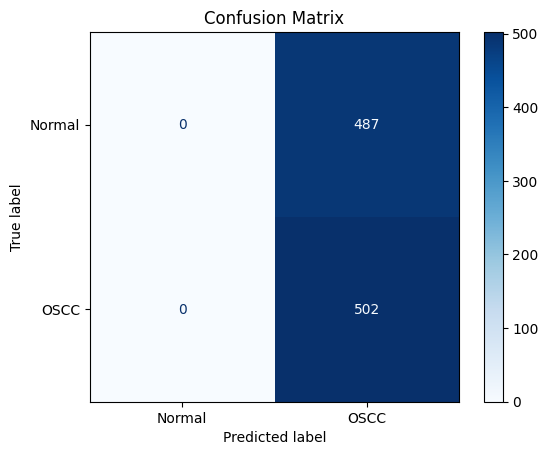

31/31 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step


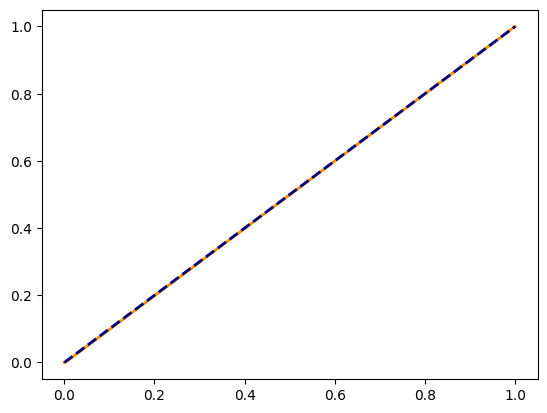

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.models import load_model  # Import the load_model function

# Load the trained model
model = load_model('oscc_model.h5')

# Get the true labels and predicted probabilities
y_true = val_generator.classes  # True labels from the validation generator
y_pred_prob = model.predict(val_generator)  # Predicted probabilities

# Convert probabilities to binary predictions (threshold 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt

# Load the trained model
model = load_model('oscc_model.h5')

# Get the true labels and predicted probabilities
y_true = val_generator.classes  # True labels from the validation generator
y_pred_prob = model.predict(val_generator)  # Predicted probabilities

# Convert probabilities to binary predictions (threshold 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)



Algorithm 2

In [26]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Set dataset path
dataset_path = '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1'

# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Prepare training data (80%)
train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(128, 128),  # Reduce image size to speed up training
    batch_size=8,  # Decrease batch size to fit in memory
    class_mode='binary',
    subset='training')

# Prepare validation data (20%)
val_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(128, 128),
    batch_size=8,
    class_mode='binary',
    subset='validation')

# Build VGG16 model as an alternative to CNN and Vision Transformer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze the base model layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Use GAP instead of Flatten to reduce parameters
    layers.Dense(64, activation='relu'),  # Reduce dense layer size
    layers.Dropout(0.3),  # Reduce dropout to maintain accuracy
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Train the model with fewer epochs
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Save the model
model.save('oscc_model_vgg16.h5')

# Evaluate model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Found 3957 images belonging to 2 classes.
Found 989 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,747,585 (56.26 MB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 918s 2s/step - accuracy: 0.6223 - loss: 0.6528 - val_accuracy: 0.7776 - val_loss: 0.5019
Epoch 2/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 860s 2s/step - accuracy: 0.7579 - loss: 0.5195 - val_accuracy: 0.7968 - val_loss: 0.4638
Epoch 3/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - accuracy: 0.7887 - loss: 0.4729 - val_accuracy: 0.7998 - val_loss: 0.4429
Epoch 4/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 876s 2s/step - accuracy: 0.7987 - loss: 0.4494 - val_accuracy: 0.8241 - val_loss: 0.4120
Epoch 5/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 904s 2s/step - accuracy: 0.8188 - loss: 0.4184 - val_accuracy: 0.7715 - val_loss: 0.4474
Epoch 6/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - accuracy: 0.8263 - loss: 0.4041 - val_accuracy: 0.8251 - val_loss: 0.3891
Epoch 7/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 856s 2s/step - accuracy: 0.8312 - loss: 0.3849 - val_accuracy: 0.8160 - val_loss: 0.3909
Epoch 8/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - accuracy: 0.8542 - loss: 0.3548 - val_accu

124/124 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.8410 - loss: 0.3469
Validation Accuracy: 81.70%


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Get model predictions
y_true = val_generator.classes  # True labels
y_pred = model.predict(val_generator)  # Predicted probabilities

# Convert probabilities to binary class predictions
y_pred_binary = (y_pred > 0.5).astype(int)



124/124 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step


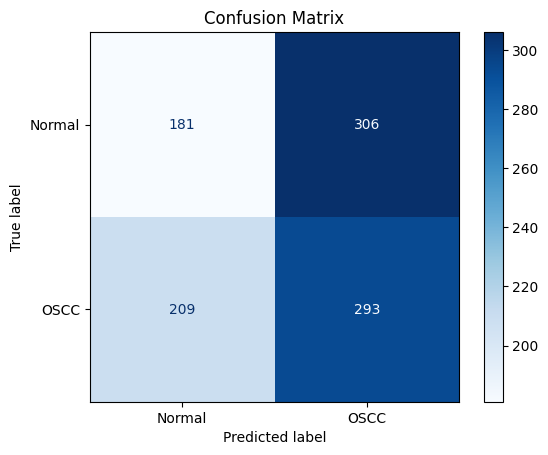

In [29]:
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

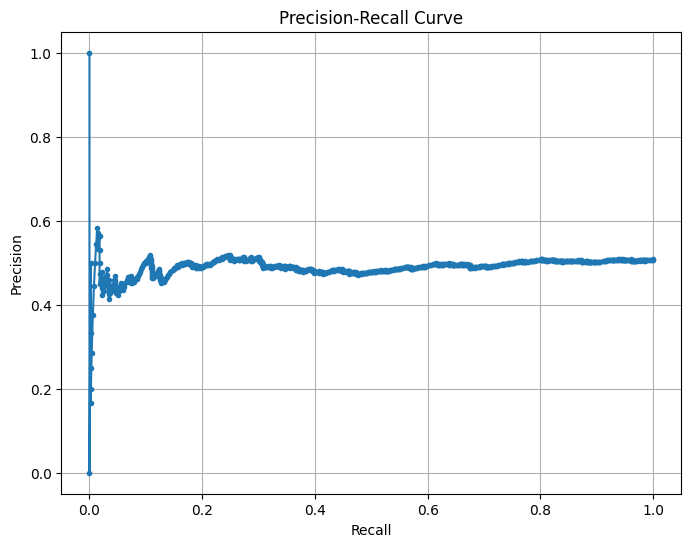

F1 Score: 0.53


In [30]:
# Generate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Optionally, calculate and display F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred_binary)
print(f"F1 Score: {f1:.2f}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step


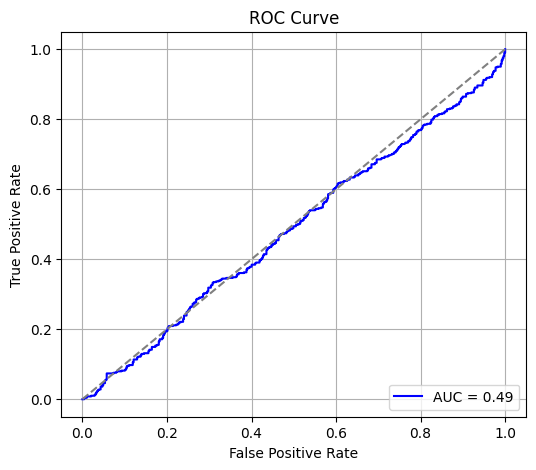

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get model predictions
y_true = val_generator.classes  # True labels
y_pred = model.predict(val_generator)  # Predicted probabilities

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Algorithm Number 3 (Completed)


In [ ]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0

# Set dataset path
dataset_path = '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1'

# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Prepare training data (80%)
train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(128, 128),
    batch_size=16,  # Increased batch size for better generalization
    class_mode='binary',
    subset='training')

# Prepare validation data (20%)
val_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation')

# Build EfficientNetB0 model as an alternative to VGG16
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze the base model layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),  # Increased dense layer for better learning
    layers.Dropout(0.4),  # Increased dropout to reduce overfitting
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Train the model with fewer epochs
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Save the model
model.save('oscc_model_efficientnet.h5')

# Evaluate model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Found 3957 images belonging to 2 classes.
Found 989 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 4, 4, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 113s 420ms/step - accuracy: 0.5159 - loss: 0.7002 - val_accuracy: 0.4924 - val_loss: 0.6970
Epoch 2/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 93s 376ms/step - accuracy: 0.4820 - loss: 0.6972 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 3/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 90s 363ms/step - accuracy: 0.4879 - loss: 0.6954 - val_accuracy: 0.4924 - val_loss: 0.6939
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 89s 360ms/step - accuracy: 0.5092 - loss: 0.6934 - val_accuracy: 0.5076 - val_loss: 0.6931
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 90s 363ms/step - accuracy: 0.4915 - loss: 0.6943 - val_accuracy: 0.5076 - val_loss: 0.6931
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 90s 363ms/step - accuracy: 0.4898 - loss: 0.6940 - val_accuracy: 0.5076 - val_loss: 0.6931
Epoch 7/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 95s 384ms/step - accuracy: 0.5145 - loss: 0.6929 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 8/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 90s 363ms/step - accuracy: 0.4984 - loss: 

62/62 ━━━━━━━━━━━━━━━━━━━━ 35s 560ms/step - accuracy: 0.5058 - loss: 0.6931
Validation Accuracy: 50.76%


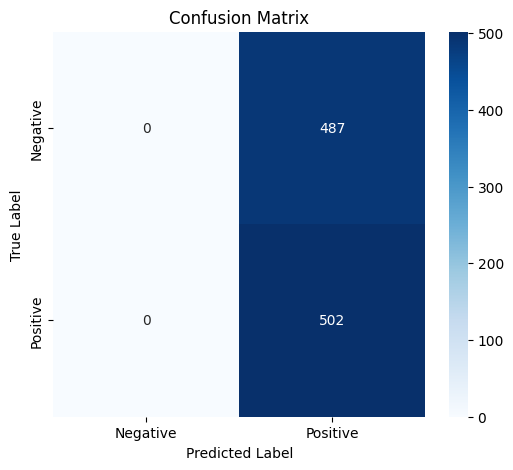

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

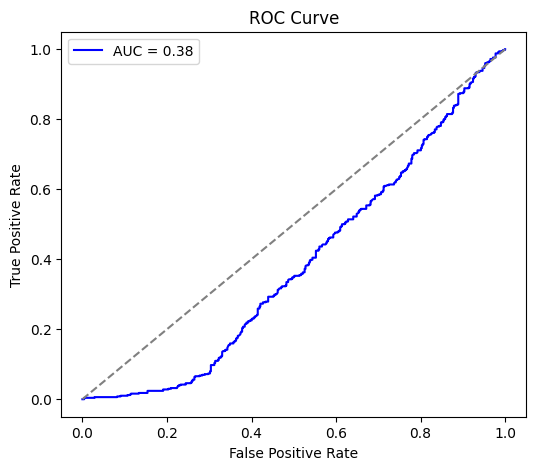

In [ ]:
# ROC Curve & AUC Score
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Algorithm 4 (Completed)

In [11]:
import os
import random
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Set dataset path (replace with the correct path)
dataset_path = '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1'

# Function to extract SIFT features from an image
def extract_sift_features(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and descriptors
    kp, des = sift.detectAndCompute(gray, None)

    if des is not None:
        return np.mean(des, axis=0)  # Using mean of descriptors as a feature vector
    else:
        return np.zeros(128)  # If no descriptors found, return zero vector

# Function to preprocess images and extract features (use only 20% of data)
def preprocess_images(base_path, sample_fraction=0.2):
    image_data = []
    labels = []

    for subdir in os.listdir(base_path):
        subdir_path = os.path.join(base_path, subdir)
        if os.path.isdir(subdir_path):
            for category in os.listdir(subdir_path):
                category_path = os.path.join(subdir_path, category)
                if os.path.isdir(category_path):
                    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                    random.shuffle(image_files)
                    image_files = image_files[:int(len(image_files) * sample_fraction)]  # Use only 20% of data

                    for image_file in image_files:
                        image_path = os.path.join(category_path, image_file)
                        features = extract_sift_features(image_path)
                        image_data.append(features)
                        labels.append(category)

    # Convert labels to numeric values
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return np.array(image_data), np.array(labels)

# Preprocess images and extract features from 20% of the data
image_data, labels = preprocess_images(dataset_path, sample_fraction=0.2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier (using a smaller max_depth for efficiency)
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 75.00%


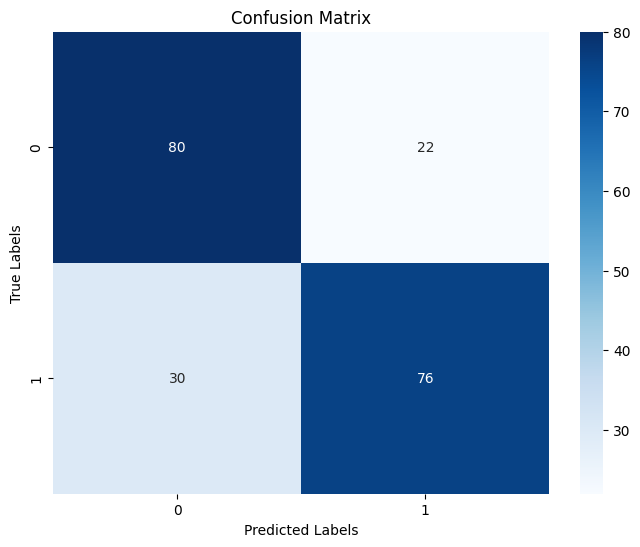

In [16]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


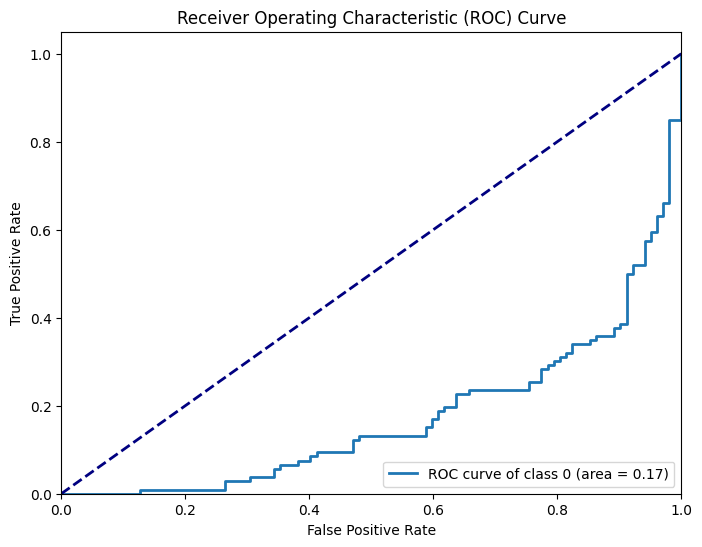

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the true labels for ROC AUC curve computation (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for each class
y_pred_prob = rf_classifier.predict_proba(X_test)

# Initialize dictionaries for FPR, TPR, and AUC
fpr, tpr, roc_auc = {}, {}, {}

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

# Plot the random guessing line (diagonal)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
